<a href="https://colab.research.google.com/github/anjanidwilestari/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np

# **TUGAS PRAKTIKUM**

**Gamma Correction**

1. Buat Gamma Correction sesuai dengan petunjuk

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


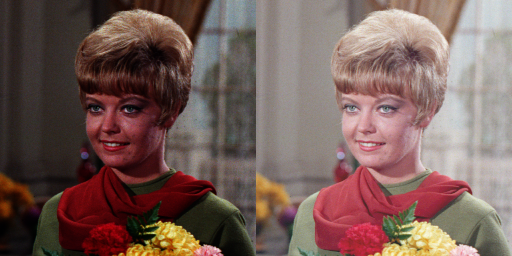

In [ ]:
# Tugas 1 : Buat Gamma Correction

print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/female.tiff')
img_gamma = np.zeros(original.shape, original.dtype)

# Akses gambar tiap pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # Rumus Gamma Correction
      img_gamma[y,x,c] = np.clip(255 * ((original[y,x,c] / 255)**(1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, img_gamma))
cv2_imshow(final_frame)

**Simulasi Image Depth**

2. Buat Simulasi Image Depth 

 Simulasi Image Depth 
----------------------------------


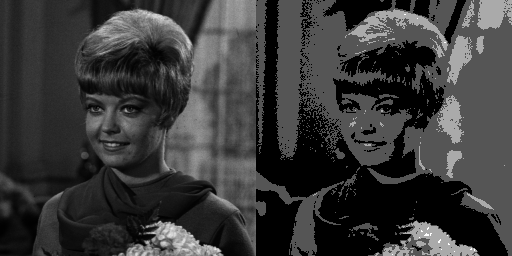

In [ ]:
# Tugas 2 : Buat Simulasi Image Depth 

print(' Simulasi Image Depth ')
print('----------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/female.tiff', cv.IMREAD_GRAYSCALE)
img_depth = np.zeros(original.shape, original.dtype)

# nilai kedalaman
depth=2

# Rumus menentukan level kedalaman
level = 255 / ((2**depth) - 1)

# Akses gambar tiap pixel
for y in range(original.shape[0]):
  # Rumus Bit Depth
  img_depth[y] = np.clip(np.round(original[y]/level)*level, 0, 255)

final_frame = cv.hconcat((original, img_depth))
cv2_imshow(final_frame)

**Average Denoising**

3. Buat modul Average Denoising

Jumlah Citra di Average = 100
Nilai MSE =  115.04557291666667
Nilai PSNR = 27.522104496829364 dB


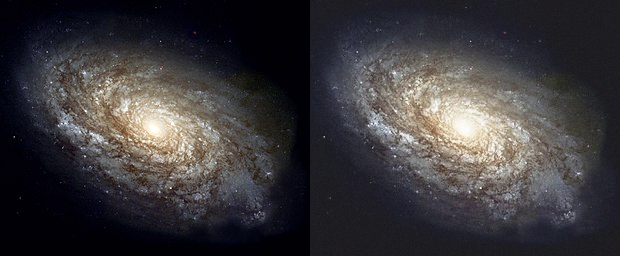

In [ ]:
#Tugas 3 Buat Modul Average Denoising dengan Jumlah citra di Average 5, 30, 60, 80,100

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/galaxy.jpg')

cv_img = [] 
for img in glob.glob('/content/drive/MyDrive/PCVK_AD/Images/noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n)

# set jumlah citra di average
noise_image = cv_img[99]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(99):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

# fungsi PSNR
def PSNR(original, compress_image5): 
    mse = np.mean((original - compress_image5) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

def MSE(original, compress_image5): 
    mse5 = np.mean((original - compress_image5) ** 2) 
    return mse5

compress_image5 = noise_image
psnr = PSNR(original, compress_image5)
mse5 = MSE(original, compress_image5)
print('Jumlah Citra di Average = 100')
print('Nilai MSE = ',mse5)
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), 
sedangkan image paling kanan

Percobaan image masking dengan XOR


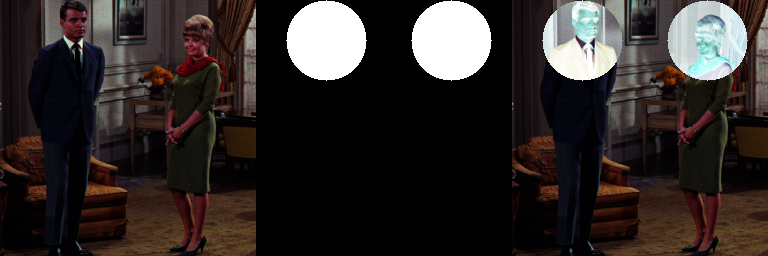

In [ ]:
img_couple = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/couple.tiff')

mask = np.zeros(img_couple.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_couple & mask

mask1 = cv.circle(mask, (195, 40), 40, (255,255,255), -1)

result = img_couple ^ mask1

final_frame = cv.hconcat((img_couple, mask, result))
print('Percobaan image masking dengan XOR')
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini